In [3]:

import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt

# Analysis of results + runtime

In [57]:
test = open("execution_times.txt")
results = [x for x in test]

# Function to read output.txt files
# Returns data in the form of scores and execution times
# in two collections: one for the fullsearch algorithm and another
# for the greedy algorithm
def open_results(filename, full, greedy):
    f = open(filename + ".txt")
    results = [line for line in f][1:]
    
    # Line at which fullsearch results stop and greedy results start
    step = 0

    # fullsearch
    fullsearch_results = []
    if full:
        for i, line in enumerate(results):
            if "None" in line:
                print("None-line")
                continue
            if line == "\n":
                step = i
                break
            line_stripped = [result for result in line.strip("\n").split(" ")]
            fullsearch_results.append((float(line_stripped[0]), 
                                       float(line_stripped[1])))
    
    # greedy
    greedy_results = []
    if greedy:
        for line in results[step + 1:]:
            if "None" in line:
                print("None-line")
                continue
            line_stripped = [result for result in line.strip("\n").split(" ")]
            greedy_results.append((float(line_stripped[0]), 
                                       float(line_stripped[1])))
    
    return fullsearch_results, greedy_results
    


fullsearch_results, greedy_results = open_results("execution_times", True, True)

print(len(fullsearch_results))
display(fullsearch_results[0:5])
print(len(greedy_results))
display(greedy_results[0:5])

100


[(0.01772533300027135, 25.5),
 (0.011328389002301265, 24.5),
 (0.006796233999921242, 23.0),
 (0.009366980000777403, 26.5),
 (0.016727794998587342, 22.5)]

100


[(0.0006449960019381251, 25.5),
 (0.0006292359976214357, 24.5),
 (0.0005340560019249097, 23.0),
 (0.0012128449998272117, 22.0),
 (0.0021109230001457036, 22.0)]

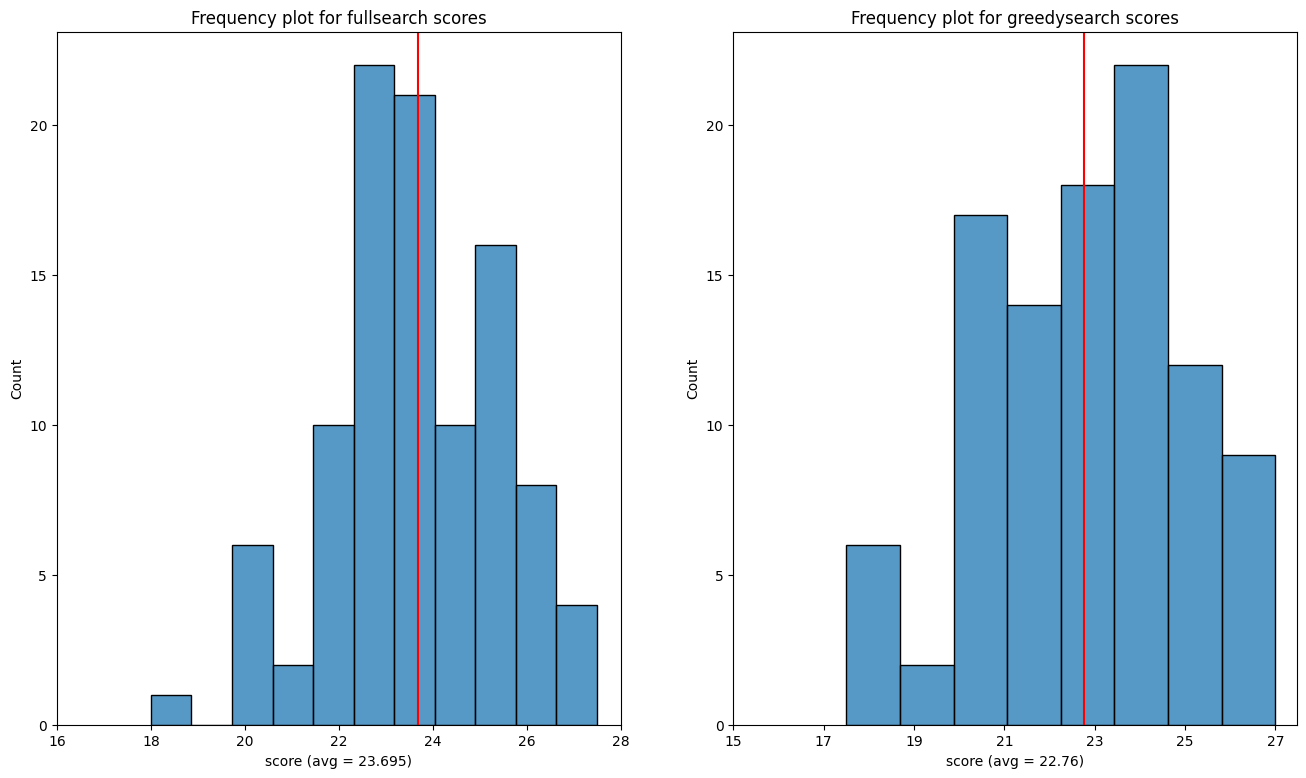

In [58]:
fig, axs = plt.subplots(1, 2, figsize=(16,9))

# fullsearch scores
fullsearch_scores = [x[1] for x in fullsearch_results]
g = sn.histplot(x = fullsearch_scores, ax = axs[0])
axs[0].axvline(np.mean(fullsearch_scores), color = "red")

xrange = list(range(int(min(fullsearch_scores)) - 2, int(max(fullsearch_scores)) + 2, 2))
g.set(xticks=xrange, title = "Frequency plot for fullsearch scores", xlabel = "score (avg = " + str(np.mean(fullsearch_scores)) + ")")



# Greedy scores
greedy_scores = [x[1] for x in greedy_results]
g2 = sn.histplot(x = greedy_scores, ax = axs[1])
axs[1].axvline(np.mean(greedy_scores), color = "red")

xrange = list(range(int(min(greedy_scores)) - 2, int(max(greedy_scores)) + 2, 2))
g2.set(xticks=xrange, title = "Frequency plot for greedysearch scores", xlabel = "score (avg = " + str(np.mean(greedy_scores)) + ")")


plt.show()

Above results are 100 runs for each algorithm where: \
amount of literals per clause = 5\
amount of variables (literals) to choose from = 20 \
amount of clauses to generate = 5

Runs are executed in parallel, meaning each run a set of clauses is generated, then that same set is used by both algorithms.

In [34]:
fullsearch_std = np.std(fullsearch_scores)
greedy_std = np.std(greedy_scores)

print("Standard deviation of fullsearch_scores: ", fullsearch_std)
print("Standard deviation of greedy_scores: ", greedy_std)


Standard deviation of fullsearch_scores:  1.756267348668761
Standard deviation of greedy_scores:  2.2186482371029435


## Influence of expression structure

In [38]:


def get_mean_values(input_value_list):
    execution_times = [line[0] for line in input_value_list]
    scores = [line[1] for line in input_value_list]
    
    return np.mean(execution_times), np.mean(scores)

    
k_values = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

mean_extimes_full = []
mean_extimes_greedy = []
mean_scores_full = []
mean_scores_greedy = []

for k in k_values:
    fullsearch_results, greedy_results = open_results("output_files/execution_timesk" + str(k), True, True)
    
    mean_extime_full, mean_score_full = get_mean_values(fullsearch_results)
    mean_extimes_full.append(mean_extime_full)
    mean_scores_full.append(mean_score_full)
    
    mean_extime_greedy, mean_score_greedy = get_mean_values(greedy_results)
    mean_extimes_greedy.append(mean_extime_greedy)
    mean_scores_greedy.append(mean_score_greedy)


    

None-line
None-line
None-line
None-line


## Influence of size of clauses

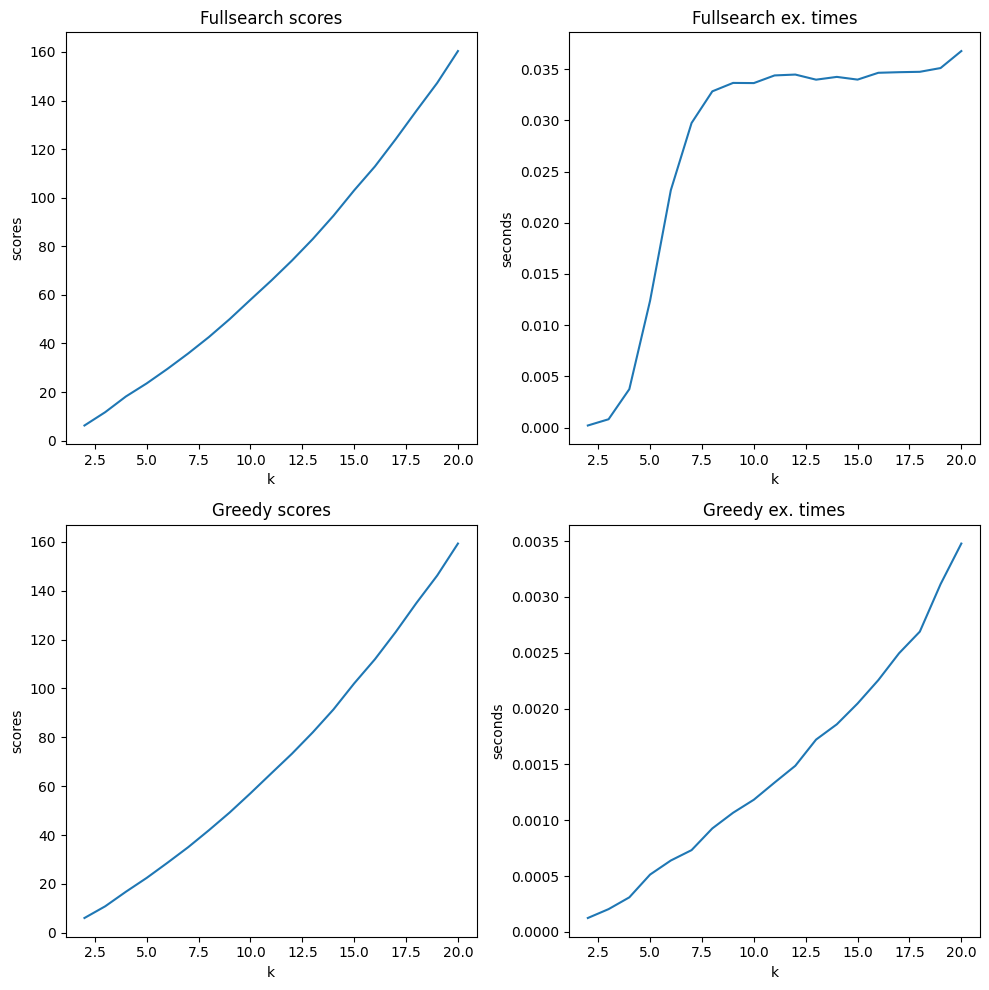

In [40]:
fig, axs = plt.subplots(2, 2, figsize = (10, 10))

sn.lineplot(x = k_values, y = mean_scores_full, ax = axs[0][0]).set(title = "Fullsearch scores", xlabel = "k", ylabel = "scores")
sn.lineplot(x = k_values, y = mean_extimes_full, ax = axs[0][1]).set(title = "Fullsearch ex. times", xlabel = "k", ylabel = "seconds")

sn.lineplot(x = k_values, y = mean_scores_greedy, ax = axs[1][0]).set(title = "Greedy scores", xlabel = "k", ylabel = "scores")
sn.lineplot(x = k_values, y = mean_extimes_greedy, ax = axs[1][1]).set(title = "Greedy ex. times", xlabel = "k", ylabel = "seconds")

fig.tight_layout()

## Influence of amount of clauses generated

In [41]:
m_values = [5, 6, 7, 8, 9, 10, 11]



mean_extimes_full = []
mean_extimes_greedy = []
mean_scores_full = []
mean_scores_greedy = []

for m in m_values:
    fullsearch_results, greedy_results = open_results("output_files/execution_timesm" + str(m), True, True)
    
    mean_extime_full, mean_score_full = get_mean_values(fullsearch_results)
    mean_extimes_full.append(mean_extime_full)
    mean_scores_full.append(mean_score_full)
    
    mean_extime_greedy, mean_score_greedy = get_mean_values(greedy_results)
    mean_extimes_greedy.append(mean_extime_greedy)
    mean_scores_greedy.append(mean_score_greedy)



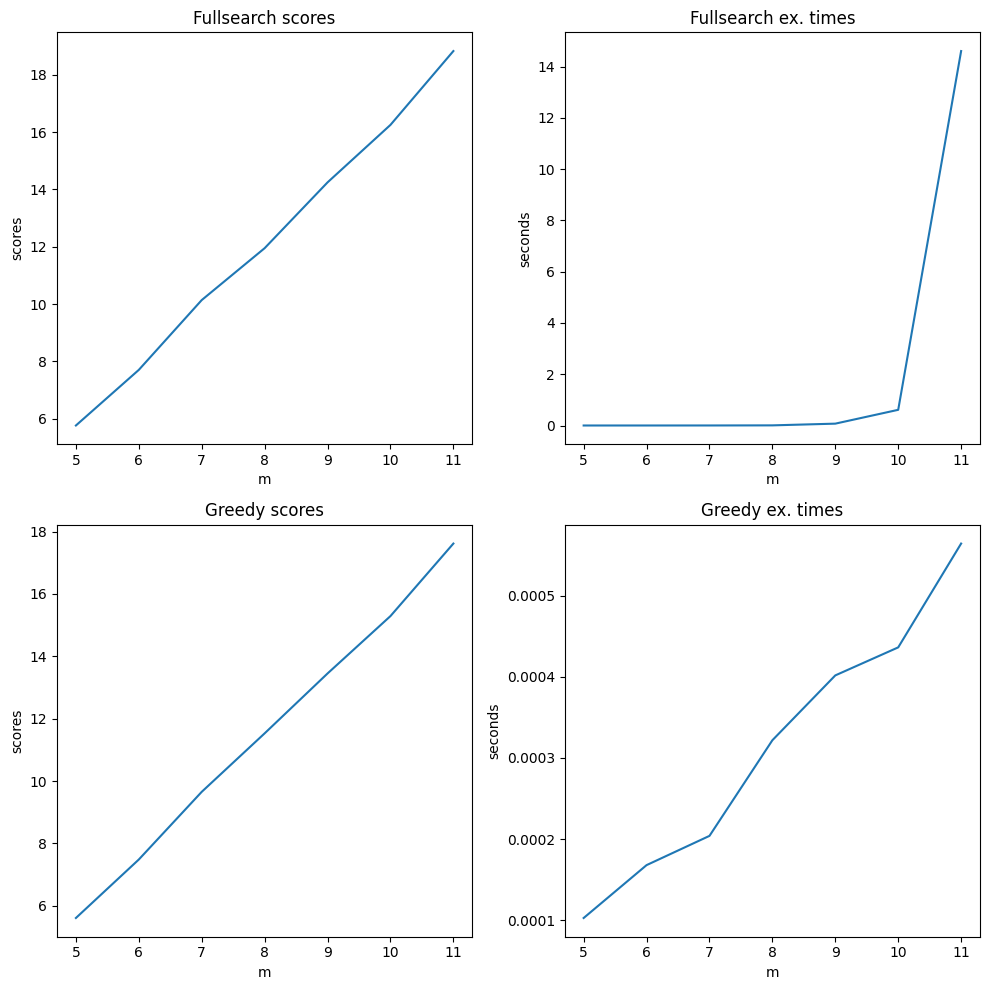

In [42]:
fig, axs = plt.subplots(2, 2, figsize = (10, 10))

sn.lineplot(x = m_values, y = mean_scores_full, ax = axs[0][0]).set(title = "Fullsearch scores", xlabel = "m", ylabel = "scores")
sn.lineplot(x = m_values, y = mean_extimes_full, ax = axs[0][1]).set(title = "Fullsearch ex. times", xlabel = "m", ylabel = "seconds")

sn.lineplot(x = m_values, y = mean_scores_greedy, ax = axs[1][0]).set(title = "Greedy scores", xlabel = "m", ylabel = "scores")
sn.lineplot(x = m_values, y = mean_extimes_greedy, ax = axs[1][1]).set(title = "Greedy ex. times", xlabel = "m", ylabel = "seconds")

fig.tight_layout()

Full search execution time rises exponentially, which is to be expected since it's a DFS algorithm that searches the entire searchspace. As the amount of clauses per rule rises, the amount of matches rises along with it, which in turn causes the amount of possible matchings to rise exponentially. In real world rulesystems there likely won't be much overlap between rules but these systems will for sure contain more rules than shown in these tests (11). The test for 12 clauses (with clauses of size 2 and 20 variables to choose from) was cutoff after an hour of running. This means the fullsearch algorithm is impractical in its current state. \
The time it takes for the greedy algorithm to search for a solution rises somewhat linearly. To be certain more experiments with only the greedy algorithm will follow.

## Influence of amount of variables to pick from

For a valid ruleset (no duplicates) there need to be atleast as many variables to pick from as clauses to generate. An assumption is made from this point: the amount of variables to pick from will generally by twice as large as the amount of clauses being generated. In general rules will be implications of some condition and some consequence, meaning two variables per clause. In reality this will differ.


In [43]:
k_values =  [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
n_values = [k*2 for k in k_values]
nk_iterations = list(range(0, 19))


mean_extimes_full = []
mean_extimes_greedy = []
mean_scores_full = []
mean_scores_greedy = []

for iteration in nk_iterations:
    fullsearch_results, greedy_results = open_results("output_files/execution_timesnk" + str(iteration), True, True)
    
    mean_extime_full, mean_score_full = get_mean_values(fullsearch_results)
    mean_extimes_full.append(mean_extime_full)
    mean_scores_full.append(mean_score_full)
    
    mean_extime_greedy, mean_score_greedy = get_mean_values(greedy_results)
    mean_extimes_greedy.append(mean_extime_greedy)
    mean_scores_greedy.append(mean_score_greedy)




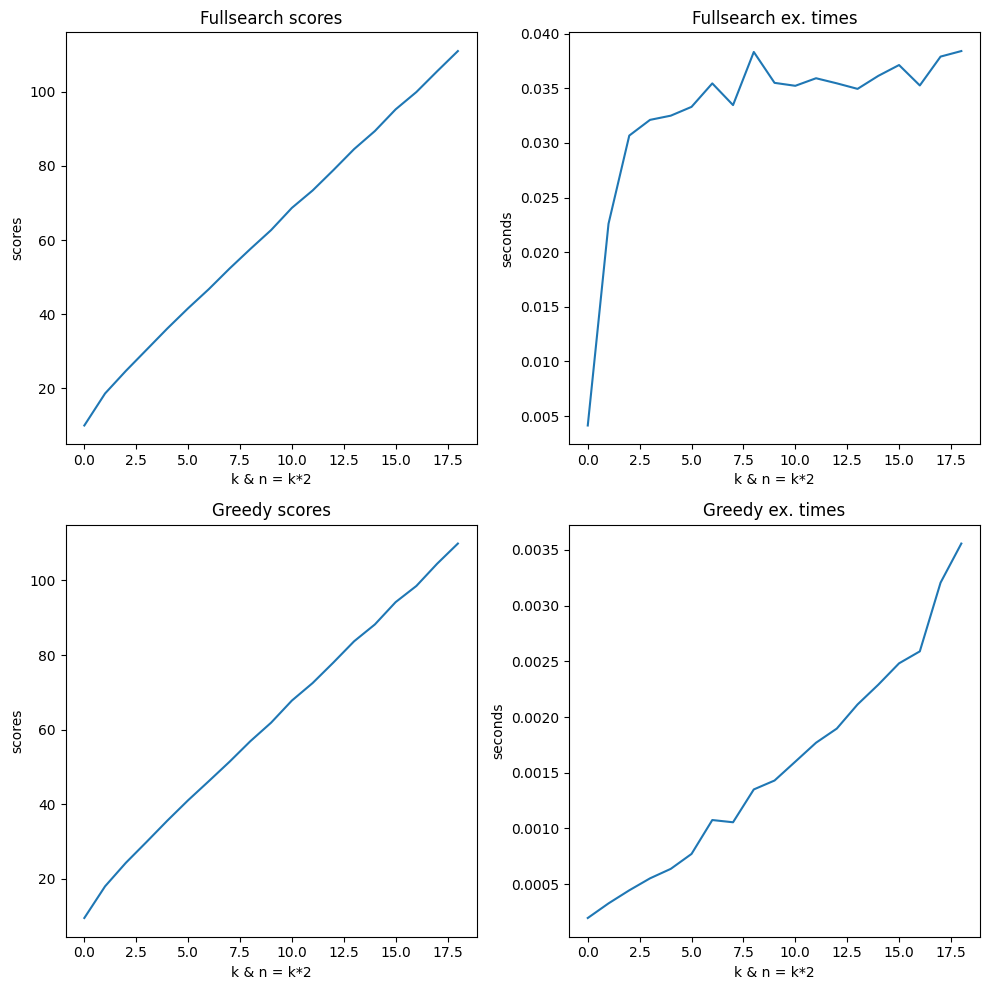

In [44]:
fig, axs = plt.subplots(2, 2, figsize = (10, 10))

sn.lineplot(x = nk_iterations, y = [x[1] for x in fullsearch_means], ax = axs[0][0]).set(title = "Fullsearch scores", xlabel = "k & n = k*2", ylabel = "scores")
sn.lineplot(x = nk_iterations, y = [x[0] for x in fullsearch_means], ax = axs[0][1]).set(title = "Fullsearch ex. times", xlabel = "k & n = k*2", ylabel = "seconds")

sn.lineplot(x = nk_iterations, y = [x[1] for x in greedy_means], ax = axs[1][0]).set(title = "Greedy scores", xlabel = "k & n = k*2", ylabel = "scores")
sn.lineplot(x = nk_iterations, y = [x[0] for x in greedy_means], ax = axs[1][1]).set(title = "Greedy ex. times", xlabel = "k & n = k*2", ylabel = "seconds")

fig.tight_layout()

Weirdly enough the execution time of the fullsearch algorithm seems to level after about k = 2 & n = 2 * k = 4. The effect of the size of clauses (and amount of variables to pick from), as long as the ratio between them stays the same, seems to be very little, at least compared to amount of clauses. When again relating to real-world cases it is unlikely to find rulesystems containing rules with more than 50 literals (some combination of conditions and consequences), so exploring larger clauses seems out of scope.

## Testing the limits of the greedy algorithm

In [55]:
m_values = list(range(5, 51, 5))
print(m_values)

mean_extimes_greedy = []
mean_scores_greedy = []


for m in m_values:
    _, greedy_results = open_results("output_files/greedyoutput3clausesm" + str(m), False, True)
    
    mean_extime_greedy, mean_score_greedy = get_mean_values(greedy_results)
    mean_extimes_greedy.append(mean_extime_greedy)
    mean_scores_greedy.append(mean_score_greedy)


[5, 10, 15, 20, 25, 30, 35, 40, 45, 50]


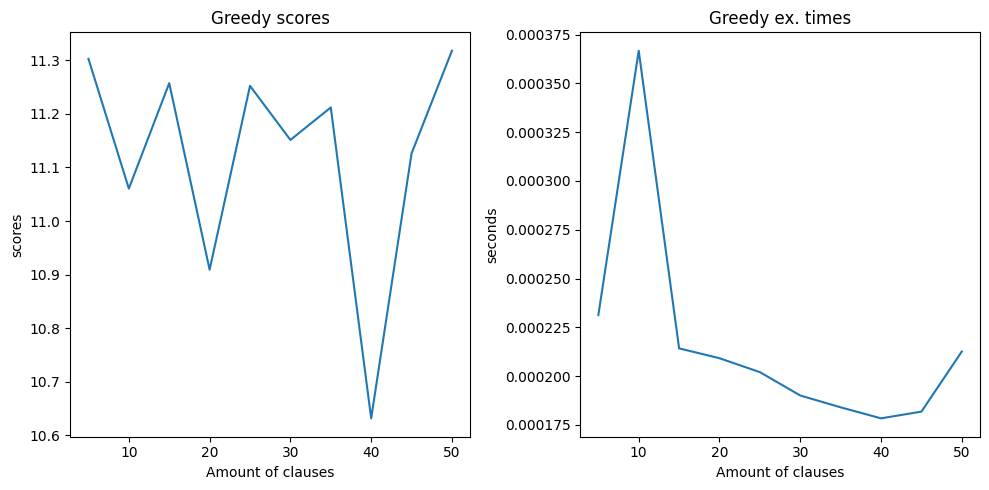

In [56]:
fig, axs = plt.subplots(1, 2, figsize = (10, 5))

sn.lineplot(x = m_values, y = mean_scores_greedy, ax = axs[0]).set(title = "Greedy scores", xlabel = "Amount of clauses", ylabel = "scores")
sn.lineplot(x = m_values, y = mean_extimes_greedy, ax = axs[1]).set(title = "Greedy ex. times", xlabel = "Amount of clauses", ylabel = "seconds")

fig.tight_layout()